In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   #import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [1]:
# #df = pd.read_csv(r"/home/uia72388/Share_A/Analyse.csv")d
# df = pd.read_csv(r'/home/uia72388/Share_A/New Data/AnalyseThis.csv')
# df.head()

In [3]:
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

In [2]:
# X = df['vdy.velocity'].dropna().values
# X

In [3]:
# X1= X.reshape(-1, 1)
# X1

In [4]:
# X2= X.reshape(1, -1)
# X2

In [5]:
# Xs1 = StandardScaler().fit_transform(X1)
# Xs1

In [6]:
# Xs2 = StandardScaler().fit_transform(X2)
# Xs2

In [1]:


# ks = range(1,10)

# # run 9 times kmeans and save each result in the KMeans object
# KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

# # now run for each cluster the BIC computation
# BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]

# print(BIC)

In [12]:

#Y = iris.target

ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X1) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X1) for kmeansi in KMeans]

print(BIC)

[-751777.8099389874, -761306.6146474819, -759565.1287761589, -755172.0860471558, -761671.259818132, -755486.4331640106, -757243.35513264, -757216.7041175995, -752477.2341892689]


In [14]:


ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(Xs1) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,Xs1) for kmeansi in KMeans]

print(BIC)

[-273828.99587498966, -283357.7703514899, -281538.2515270684, -277232.88433788763, -284201.5552995086, -277456.98588378273, -279081.81287367776, -279330.1216124322, -274297.02898125607]


In [31]:
from sklearn.mixture import GaussianMixture
n_clusts = [i for i  in range(1,12)]

In [47]:
for i in n_clusts:
    model = GaussianMixture(n_components= i, init_params='kmeans')
    model.fit(X1)
    print("aic:" , model.aic(X1))
    print("bic:", model.bic(X1))
    print(" ")

aic: 1503535.2792642375
bic: 1503555.619875361
 
aic: 1486188.6157034829
bic: 1486239.4672312916
 
aic: 1430247.024954553
bic: 1430328.387399047
 
aic: 1464597.4855325923
bic: 1464709.3588937712
 
aic: 1425737.4186231964
bic: 1425879.8029010606
 
aic: 1423346.7136492643
bic: 1423519.6088438137
 
aic: 1421710.359564944
bic: 1421913.7656761785
 
aic: 1420302.862476565
bic: 1420536.7795044847
 
aic: 1420009.406249933
bic: 1420273.834194538
 
aic: 1417518.63283382
bic: 1417813.57169511
 
aic: 1417013.521027073
bic: 1417338.9708050482
 


In [51]:
x=[]
for i in range(0,len(X1)):
    x.append(i)

In [52]:
len(X1)

192973

In [58]:
y=[]
import random
c = 0
for i in X1:
    c+=1
    if c ==300:
        c=0
    else:
        continue
    y.append(i)    
x=[]
for i in range(643):   #len(y)=643
    x.append(i)

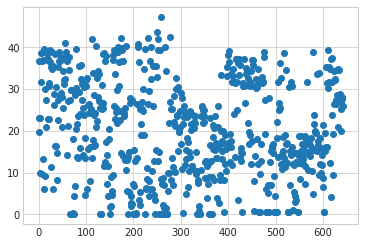

In [59]:
plt.scatter(x= x, y=y)

In [57]:
len(y)

643

In [91]:
data = df['vdy.velocity'].values
from scipy.cluster.vq import kmeans,vq
centroids,labels = kmeans(data, 2 ) # len(mi) =5 (no. of peaks)
idx,_ = vq(data,centroids)

In [7]:
# df2= pd.DataFrame({'idx':idx,'velocity':data})
# df2.head()

In [93]:
df2.idx.unique()

array([0, 1])

In [94]:
#0
v1=[]
for _,row in df2.iterrows():
    if row['idx'] == 0:
        v1.append(row['velocity'])
#1
v2=[]
for _,row in df2.iterrows():
    if row['idx'] == 1:
        v2.append(row['velocity'])        

In [95]:
len(v1), len(v2), len(v1)+len(v2)

(107164, 85809, 192973)

In [96]:
max(v1) , max(v2)

(21.199995040893555, 53.28174591064453)

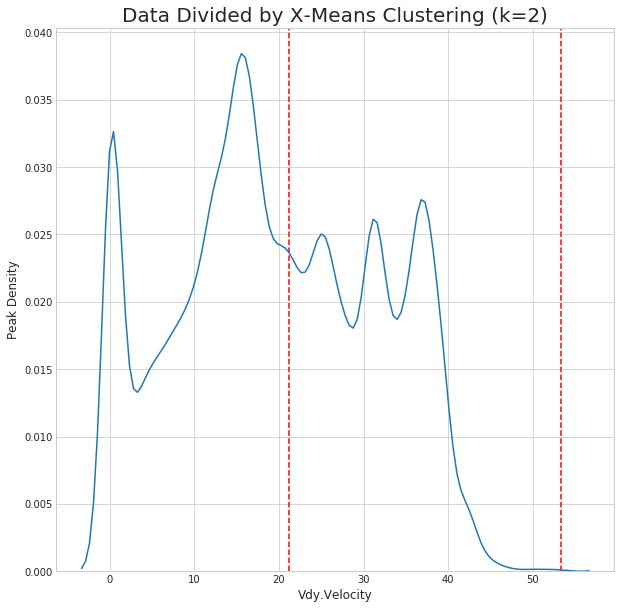

In [97]:
plt.figure(figsize=(10,10))
plt.axvline(max(v1),linestyle='--',color='r')
plt.axvline(max(v2),linestyle='--',color='r')

sns.distplot(df['vdy.velocity'], kde=True, hist=False)
plt.title("Data Divided by X-Means Clustering (k=2)" , fontsize=20)
plt.xlabel('Vdy.Velocity', fontsize=12)
plt.ylabel('Peak Density', fontsize=12)
plt.savefig('X-means Clustering (k=2).jpg')

In [98]:
y=[]
import random
c = 0
for i in v1:
    c+=1
    if c ==300:
        c=0
    else:
        continue
    y.append(i)

In [99]:
c = 0
for i in v2:
    c+=1
    if c ==300:
        c=0
    else:
        continue
    y.append(i)
len(y)

643

In [100]:
x = range(643)

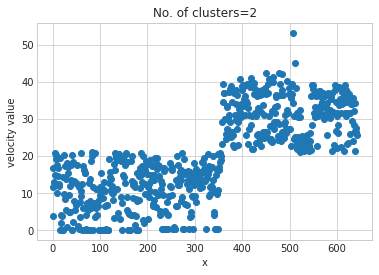

In [101]:
plt.scatter(x= x, y=y)
plt.title('No. of clusters=2')
plt.ylabel('velocity value')
plt.xlabel('x')
plt.savefig('X_means1.jpg')

In [32]:
data = df['vdy.velocity'].values
from scipy.cluster.vq import kmeans,vq
centroids,labels = kmeans(data, 4 ) # len(mi) =5 (no. of peaks)
idx,_ = vq(data,centroids)

In [33]:
df2= pd.DataFrame({'idx':idx,'velocity':data})
df2.head()

,idx,velocity
0,1,14.076314
1,1,12.634358
2,1,13.949627
3,1,14.012307
4,1,13.885149


In [34]:
df2.idx.unique()

array([1, 2, 3, 0])

In [35]:
#0
v1=[]
for _,row in df2.iterrows():
    if row['idx'] == 0:
        v1.append(row['velocity'])
#1
v2=[]
for _,row in df2.iterrows():
    if row['idx'] == 1:
        v2.append(row['velocity'])
        
v3=[]
for _,row in df2.iterrows():
    if row['idx'] == 2:
        v3.append(row['velocity'])      

v4=[]
for _,row in df2.iterrows():
    if row['idx'] == 3:
        v4.append(row['velocity'])

In [38]:
len(v1)/158, len(v2)/158, len(v3)/158, len(v4)/158, len(v1)+len(v2)+len(v3)+len(v3)


(277.7721518987342,
 384.4240506329114,
 245.51898734177215,
 313.63291139240505,
 182211)

In [37]:
max(v1) , max(v2), max(v3) , max(v4)

(30.0386905670166, 19.56413459777832, 8.91291618347168, 53.28174591064453)

In [76]:
y=[]
import random
c = 0
for i in v1:
    c+=1
    if c ==271:
        c=0
    else:
        continue
    y.append(i)

In [77]:
c = 0
for i in v2:
    c+=1
    if c ==380:
        c=0
    else:
        continue
    y.append(i)
c = 0
for i in v3:
    c+=1
    if c ==239:
        c=0
    else:
        continue
    y.append(i)
c = 0
for i in v4:
    c+=1
    if c ==307:
        c=0
    else:
        continue
    y.append(i)    

In [78]:
len(y)

643

In [79]:
x=range(643)

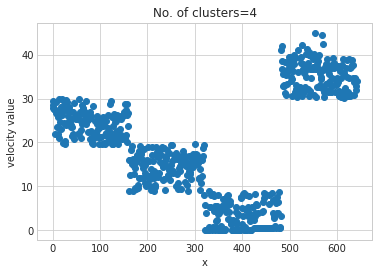

In [90]:
plt.scatter(x= x, y=y)
plt.title('No. of clusters=4')
plt.ylabel('velocity value')
plt.xlabel('x')
plt.savefig('X_means2.jpg')